C:\Users\91733\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


First few rows of the dataset:
   PatientID  Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel  \
0       6000   44       0          1                    2               1   
1       6001   51       1          0                    1               2   
2       6002   89       1          0                    1               3   
3       6003   21       1          1                    1               2   
4       6004   27       1          0                    1               3   

         BMI  Smoking  AlcoholConsumption  PhysicalActivity  ...  \
0  32.985284        1            4.499365          2.443385  ...   
1  39.916764        0            1.578919          8.301264  ...   
2  19.782251        0            1.177301          6.103395  ...   
3  32.376881        1            1.714621          8.645465  ...   
4  16.808600        0           15.462549          4.629383  ...   

   TinglingHandsFeet  QualityOfLifeScore  HeavyMetalsExposure  \
0                  1           7

C:\Users\91733\AppData\Local\Temp\ipykernel_8184\2259199033.py:33: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_no_outliers = df_cleaned[~((df_cleaned < (Q1 - 1.5 * IQR)) | (df_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)]



Data after cleaning (first few rows):
    PatientID  Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel  \
4        6004   27       1          0                    1               3   
5        6005   65       0          0                    0               0   
21       6021   88       1          0                    0               1   
34       6034   24       1          0                    1               2   
48       6048   58       0          1                    1               2   

          BMI  Smoking  AlcoholConsumption  PhysicalActivity  ...  \
4   16.808600        0           15.462549          4.629383  ...   
5   15.820815        1           17.781024          9.252522  ...   
21  26.684686        0            4.567949          6.457714  ...   
34  33.519385        0           11.924916          2.256814  ...   
48  18.033401        0           11.248318          5.623625  ...   

    TinglingHandsFeet  QualityOfLifeScore  HeavyMetalsExposure  \
4          

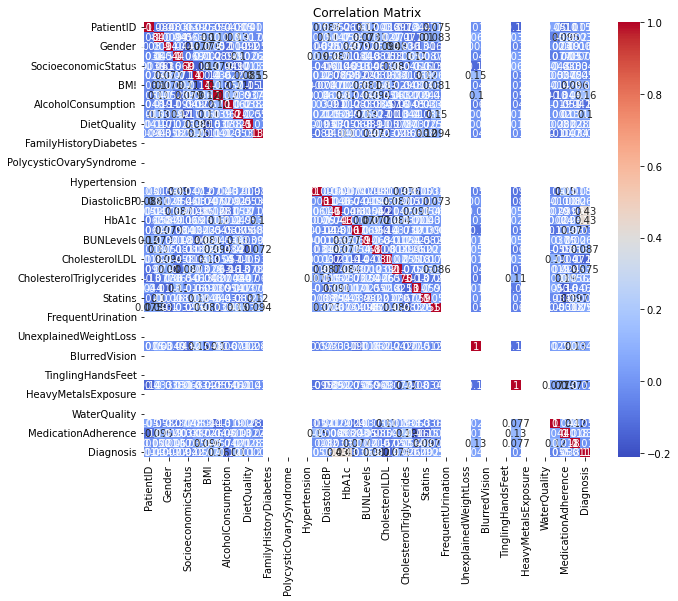

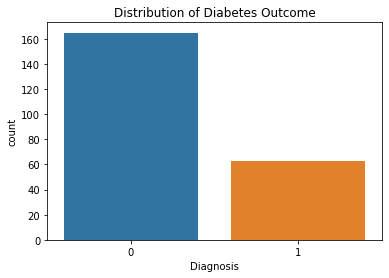


Average FastingBloodSugar Level for Diabetic vs Non-Diabetic:
Diagnosis
0    122.367992
1    159.520520
Name: FastingBloodSugar, dtype: float64


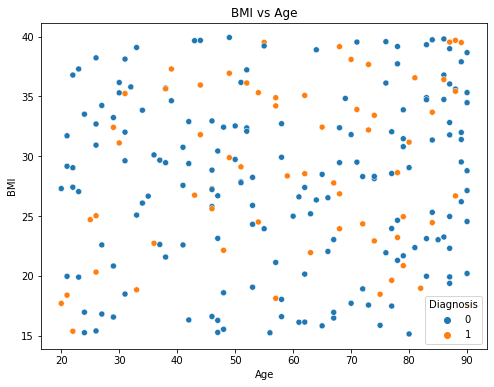


Percentage of patients with diabetes: 27.63%


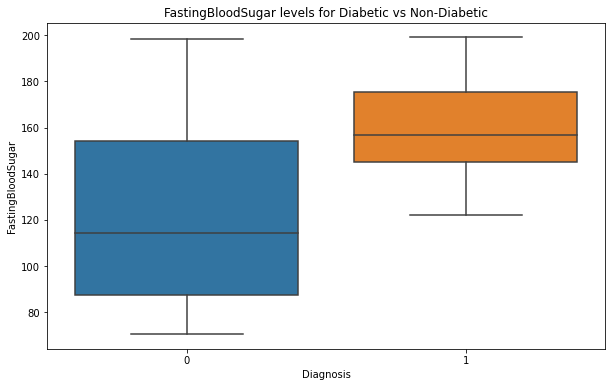

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the CSV file
df = pd.read_csv("C:\\Users\\91733\\Downloads\\Python Dataset-20240928T160518Z-001\\Python Dataset\\archive (3)\\diabetes_data.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Data Cleaning

# Check for missing values
print("\nMissing values in each column:")
missing_values = df.isnull().sum()
print(missing_values)

# Drop rows with missing values or handle them appropriately
df_cleaned = df.dropna()

# Check for duplicates and remove them
df_cleaned = df_cleaned.drop_duplicates()

# Detect outliers using the Interquartile Range (IQR) method
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df_no_outliers = df_cleaned[~((df_cleaned < (Q1 - 1.5 * IQR)) | (df_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nData after cleaning (first few rows):")
print(df_no_outliers.head())

# Exploratory Data Analysis (EDA)

# Summary statistics
print("\nSummary statistics:")
print(df_no_outliers.describe())

# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df_no_outliers.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Distribution of target variable (assuming 'Outcome' is the diabetes diagnosis column)
sns.countplot(x='Diagnosis', data=df_no_outliers)
plt.title('Distribution of Diabetes Outcome')
plt.show()

# Question 1: What is the average glucose level for diabetic vs non-diabetic individuals?
print("\nAverage FastingBloodSugar Level for Diabetic vs Non-Diabetic:")
avg_FastingBloodSugar = df_no_outliers.groupby('Diagnosis')['FastingBloodSugar'].mean()
print(avg_FastingBloodSugar)

# Question 2: What is the relationship between BMI and age in diabetic patients?
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='BMI', hue='Diagnosis', data=df_no_outliers)
plt.title('BMI vs Age')
plt.show()

# Question 3: What is the percentage of patients diagnosed with diabetes?
diabetic_percentage = df_no_outliers['Diagnosis'].mean() * 100
print(f"\nPercentage of patients with diabetes: {diabetic_percentage:.2f}%")

# Data Visualization

# Boxplot for Glucose levels based on diabetes outcome
plt.figure(figsize=(10,6))
sns.boxplot(x='Diagnosis', y='FastingBloodSugar', data=df_no_outliers)
plt.title('FastingBloodSugar levels for Diabetic vs Non-Diabetic')
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(df_no_outliers, hue='Diagnosis')
plt.show()
